In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import io
from google.cloud import bigquery, storage
from google.oauth2 import credentials # NOTE this is for future adaption for MCC deployed solution using creds

In [16]:
def get_blob(blobs):
    for blob in blobs:
        yield blob
    
def write_png_to_gcs(blob, bucket):
    print(blob.name)
    #NOTE: important to use pyplot instantiation this way to ensure no memory leaks
    fig = plt.figure(num=1,figsize=(256,16), clear=True)
    data = blob.download_as_bytes()
    df = pd.read_csv(io.BytesIO(data), sep='\s', header=None)
    # df=pd.read_csv(blob.name, sep='\s', header=None)
    # filename=filename.split('.')[0]
    df.columns=['x_axis', 'y_axis']
    ax = fig.add_subplot()
    ax.plot(df['x_axis'], df['y_axis'], color='black', linewidth=1)
    plt.xlim([0.8,8.8])
    plt.ylim([-250, 250000])
    ax.axis('off')

    buf = io.BytesIO()
    fig.tight_layout()
    fig.savefig(buf, format='png')

    filename = blob.name.split('.')[0] # remove the suffix/file extension
    filename = filename.split('/')[1] # remove the containing directory name from filename

    upload_blob = bucket.blob(image_dir+filename+'_nmr.png')
    upload_blob.upload_from_file(buf, content_type='image/png', rewind=True)

    # plt.close()
    buf.close()
    del df
    # del plt
    del data
    del upload_blob
    
    return

Kidney_TX_Data/output_NormalizationTool_spectrum_zgpr30-urine-600MHz-310K_12_571_00000_withoutBackground_20001.txt
Kidney_TX_Data/output_NormalizationTool_spectrum_zgpr30-urine-600MHz-310K_12_572_00000_withoutBackground_20001.txt
Kidney_TX_Data/output_NormalizationTool_spectrum_zgpr30-urine-600MHz-310K_12_573_00000_withoutBackground_20001.txt
Kidney_TX_Data/output_NormalizationTool_spectrum_zgpr30-urine-600MHz-310K_12_574_00000_withoutBackground_20001.txt
Kidney_TX_Data/output_NormalizationTool_spectrum_zgpr30-urine-600MHz-310K_12_575_00000_withoutBackground_20001.txt
Kidney_TX_Data/output_NormalizationTool_spectrum_zgpr30-urine-600MHz-310K_12_576_00000_withoutBackground_20001.txt
Kidney_TX_Data/output_NormalizationTool_spectrum_zgpr30-urine-600MHz-310K_12_577_00000_withoutBackground_20001.txt
Kidney_TX_Data/output_NormalizationTool_spectrum_zgpr30-urine-600MHz-310K_12_578_00000_withoutBackground_20001.txt
Kidney_TX_Data/output_NormalizationTool_spectrum_zgpr30-urine-600MHz-310K_12_579

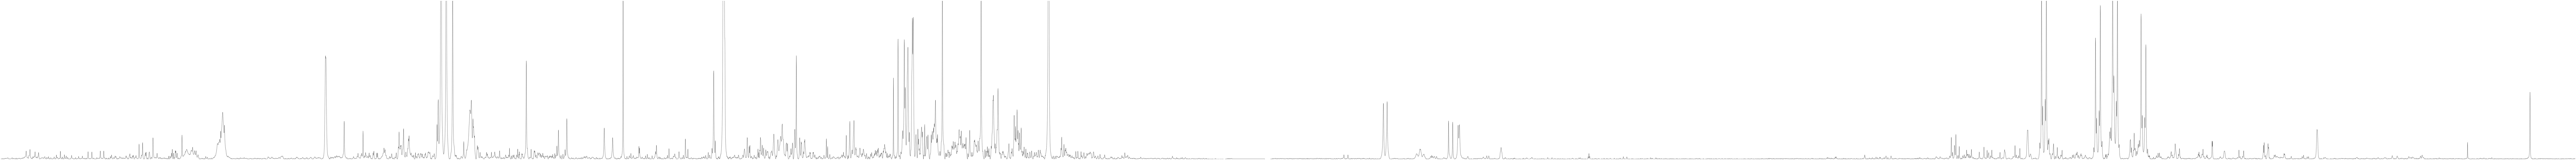

In [18]:
image_dir='spec_train_output/processed_images/'
# plt.figure(figsize=(300,40))

# initialize the GCS client
storage_client = storage.Client()

# get the storage bucket
bucket = storage_client.get_bucket('spectrain')

# Note: Client.list_blobs requires at least package version 1.17.0.
blobs = storage_client.list_blobs('spectrain', prefix='Kidney_TX_Data')

i = 0 # counter to use for breaking

# Note: The call returns a response only when the iterator is consumed.
for blob in get_blob(blobs):
    if("output" in blob.name):
        write_png_to_gcs(blob, bucket)
        #i = i+1
        #if(i == 3):
         #   break;
